Imports

In [1]:
%pip install --upgrade plotly
%pip install --upgrade seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Présentation d'un dataframe utilisé

In [2]:
steam_viz_df = pd.read_csv('/workspaces/Steam-games-overview-Prj/steam.csv')

steam_viz_df.head()

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


Graphiques généraux

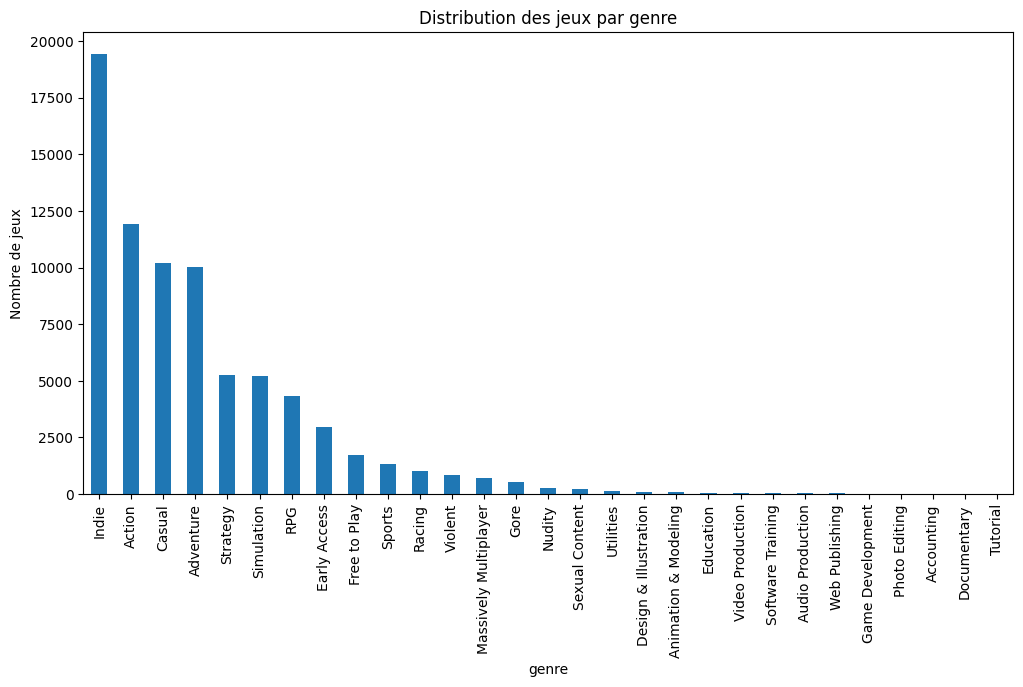

In [3]:
import matplotlib.pyplot as plt

# Utilisez explode pour dérouler la colonne "Genres" en une série
genres_series = steam_viz_df['genres'].str.split(';').explode()

# Comptez le nombre de chaque genre
genre_counts = genres_series.value_counts()
top = 50
top_genres = genre_counts.head(top)
# Créez un graphique à barres
plt.figure(figsize=(12, 6))
top_genres.plot(kind='bar')
plt.title("Distribution des jeux par genre")
plt.xlabel("genre")
plt.ylabel("Nombre de jeux")
plt.xticks(rotation=90)
plt.show()


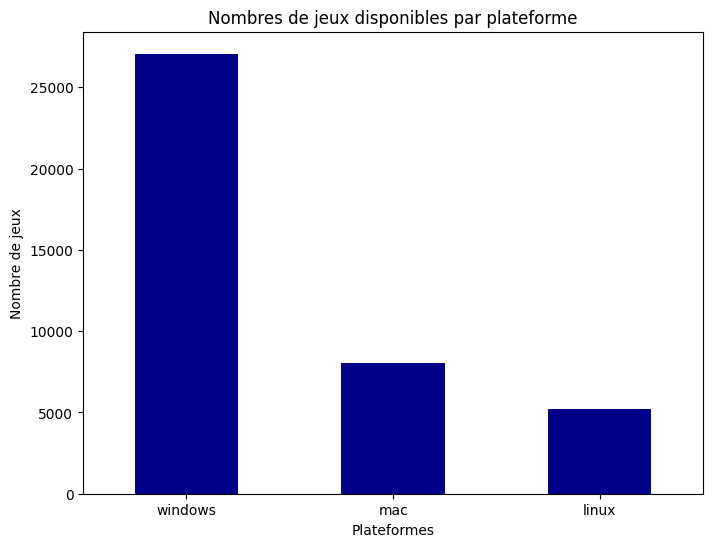

In [4]:
# Compte le nombre d'occurences pour chaque plateformes
platform_counts = steam_viz_df['platforms'].str.split(';').explode().value_counts()

# Création du diagramme de barres
plt.figure(figsize=(8, 6))
platform_counts.plot(kind='bar', color='darkblue')
plt.title('Nombres de jeux disponibles par plateforme')
plt.xlabel('Plateformes')
plt.ylabel('Nombre de jeux')
plt.xticks(rotation=0)
plt.show()

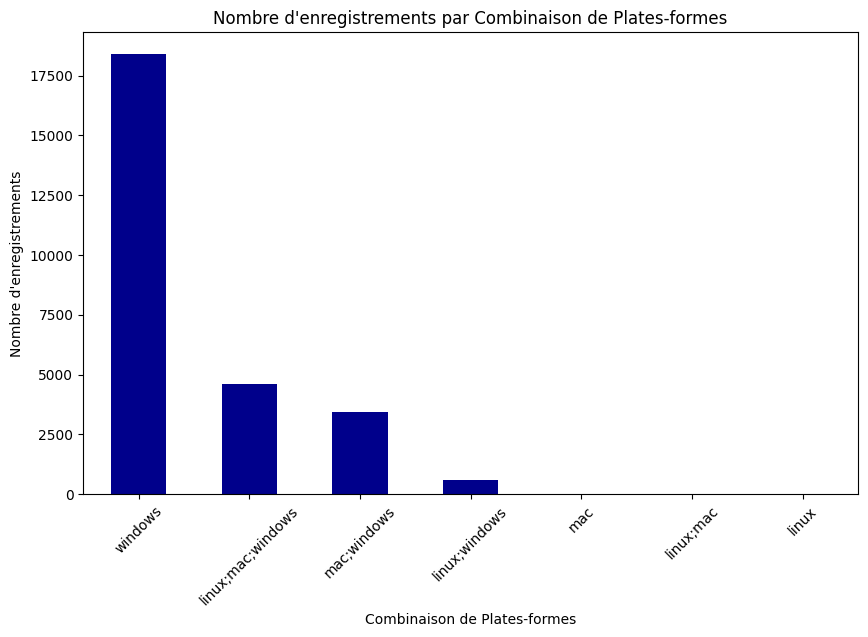

In [5]:
# Fonction pour déterminer la combinaison de plates-formes
def determine_platform_combination(platforms):
    platform_list = platforms.split(';')
    if len(platform_list) == 1:
        return platform_list[0]
    return ';'.join(sorted(platform_list))

# Appliquer la fonction pour créer une nouvelle colonne "platform_combination"
steam_viz_df['platform_combination'] = steam_viz_df['platforms'].apply(determine_platform_combination)

# Exclure les enregistrements avec les trois plates-formes
df_filtered = steam_viz_df[~steam_viz_df['platform_combination'].str.contains('windows;mac;linux')]

# Compter les occurrences de chaque combinaison de plates-formes
platform_counts = df_filtered['platform_combination'].value_counts()

# Créer un diagramme à barres
plt.figure(figsize=(10, 6))
platform_counts.plot(kind='bar', color='darkblue')
plt.title('Nombre d\'enregistrements par Combinaison de Plates-formes')
plt.xlabel('Combinaison de Plates-formes')
plt.ylabel('Nombre d\'enregistrements')
plt.xticks(rotation=45)
plt.show()

/tmp/ipykernel_1497/1314136817.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  windows_only_df['genres'] = windows_only_df['steamspy_tags'].str.split(';')


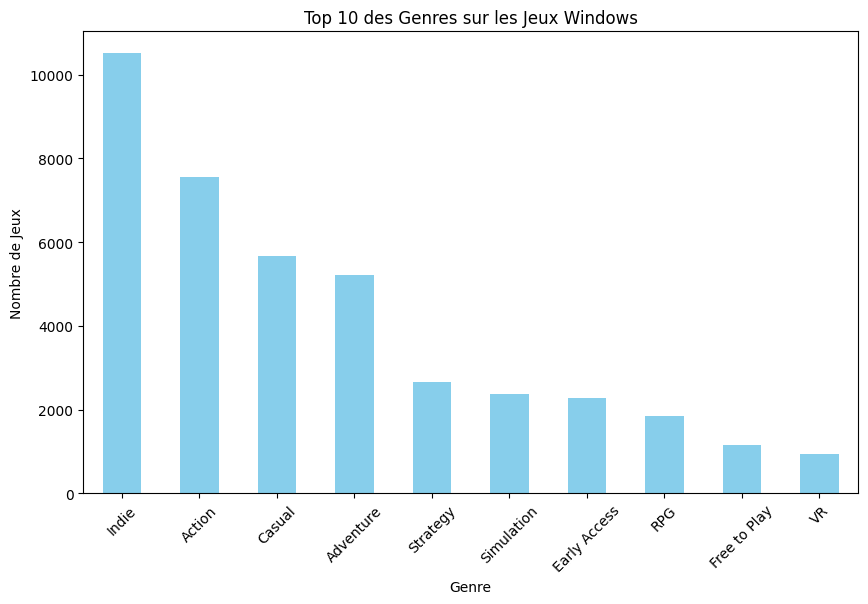

In [6]:
df = steam_viz_df
# Filtrer les jeux "Windows" uniquement
windows_only_df = df[df['platforms'] == 'windows']

# Diviser la colonne "steamspy_tags" en listes de genres
windows_only_df['genres'] = windows_only_df['steamspy_tags'].str.split(';')

# Créer une liste de tous les genres
all_genres = [genre for sublist in windows_only_df['genres'] for genre in sublist]

# Compter les occurrences de chaque genre
genre_counts = pd.Series(all_genres).value_counts()

# Sélectionner les 10 premiers genres
top_10_genres = genre_counts.head(10)

# Créer un graphique à barres pour les 10 premiers genres
plt.figure(figsize=(10, 6))
top_10_genres.plot(kind='bar', color='skyblue')
plt.title('Top 10 des Genres sur les Jeux Windows')
plt.xlabel('Genre')
plt.ylabel('Nombre de Jeux')
plt.xticks(rotation=45)
plt.show()

Cela nous permet de voir que les jeux développés uniquement pour windows sont majoritairement des jeux dit "indie" et donc produits par des studios indépendants. On peut aussi se questionner sur la présence du genre Early-access qui n'est pas si familier que ça dans le paysage du jeu vidéo surtout si on remonte quelques années en arrière.

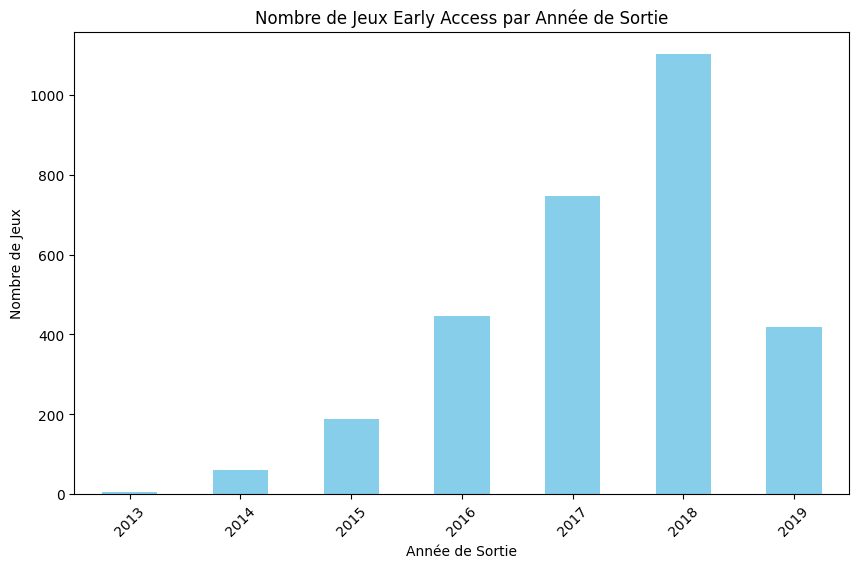

In [7]:
# Extraction de l'année à partir de la colonne 'release_date'
df['release_year'] = pd.to_datetime(df['release_date']).dt.year

# Filtrer les jeux avec le genre "Early Access"
early_access_games = df[df['steamspy_tags'].str.contains('Early Access')]

# Compter le nombre de jeux par année
games_per_year = early_access_games['release_year'].value_counts().sort_index()

# Créer un graphique à barres
plt.figure(figsize=(10, 6))
games_per_year.plot(kind='bar', color='skyblue')
plt.title('Nombre de Jeux Early Access par Année de Sortie')
plt.xlabel('Année de Sortie')
plt.ylabel('Nombre de Jeux')
plt.xticks(rotation=45)
plt.show()

Même graphique cependant avec une source possédant moins de jeux mais étant + à jour

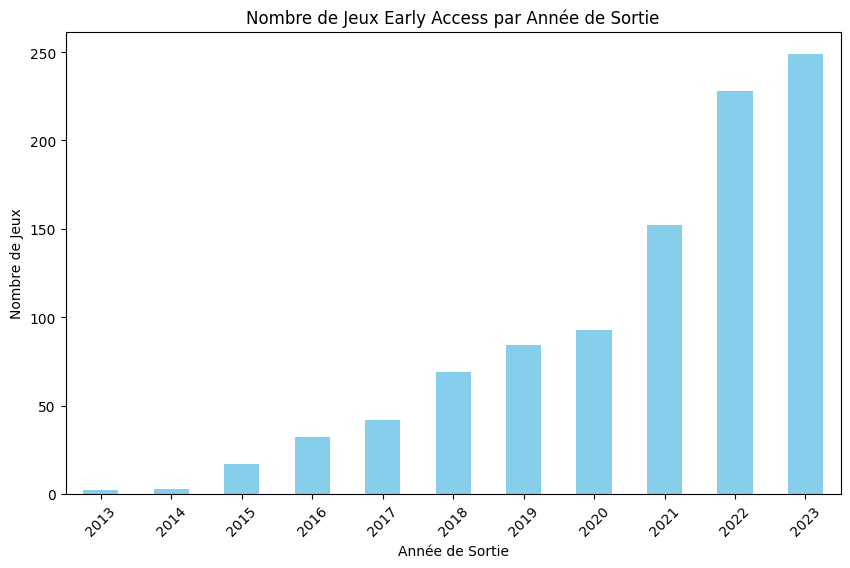

In [38]:
import ast
import matplotlib.pyplot as plt
import re

# Charger le jeu de données depuis un fichier CSV 
data = pd.read_csv("/workspaces/Steam-games-overview-Prj/bloc 3 ML TF-IDF/steam_data_sans_langues.csv")

# Filter out rows where "date_de_parution" is NaN, empty, or "Non renseignée"
data = data[data['date_de_parution'].notna() & (data['date_de_parution'] != "") & (data['date_de_parution'] != "Non renseignée")]
data = data[data['Développeur'].notna() & (data['Développeur'] != "") & (data['date_de_parution'] != "Non renseignée")]

# Extract the year from the last 4 characters of the "date_de_parution" column
data['release_year'] = data['date_de_parution'].str[-4:]

# Get rid of float types representing nan values
data = data[data['Genres'].apply(type) != float]

# Filtrer les jeux avec le genre "Early Access"
early_access_games = data[data['Genres'].str.contains('Early Access')]

# Compter le nombre de jeux par année
games_per_year = early_access_games['release_year'].value_counts().sort_index()

# Créer un graphique à barres
plt.figure(figsize=(10, 6))
games_per_year.plot(kind='bar', color='skyblue')
plt.title('Nombre de Jeux Early Access par Année de Sortie')
plt.xlabel('Année de Sortie')
plt.ylabel('Nombre de Jeux')
plt.xticks(rotation=45)
plt.show()

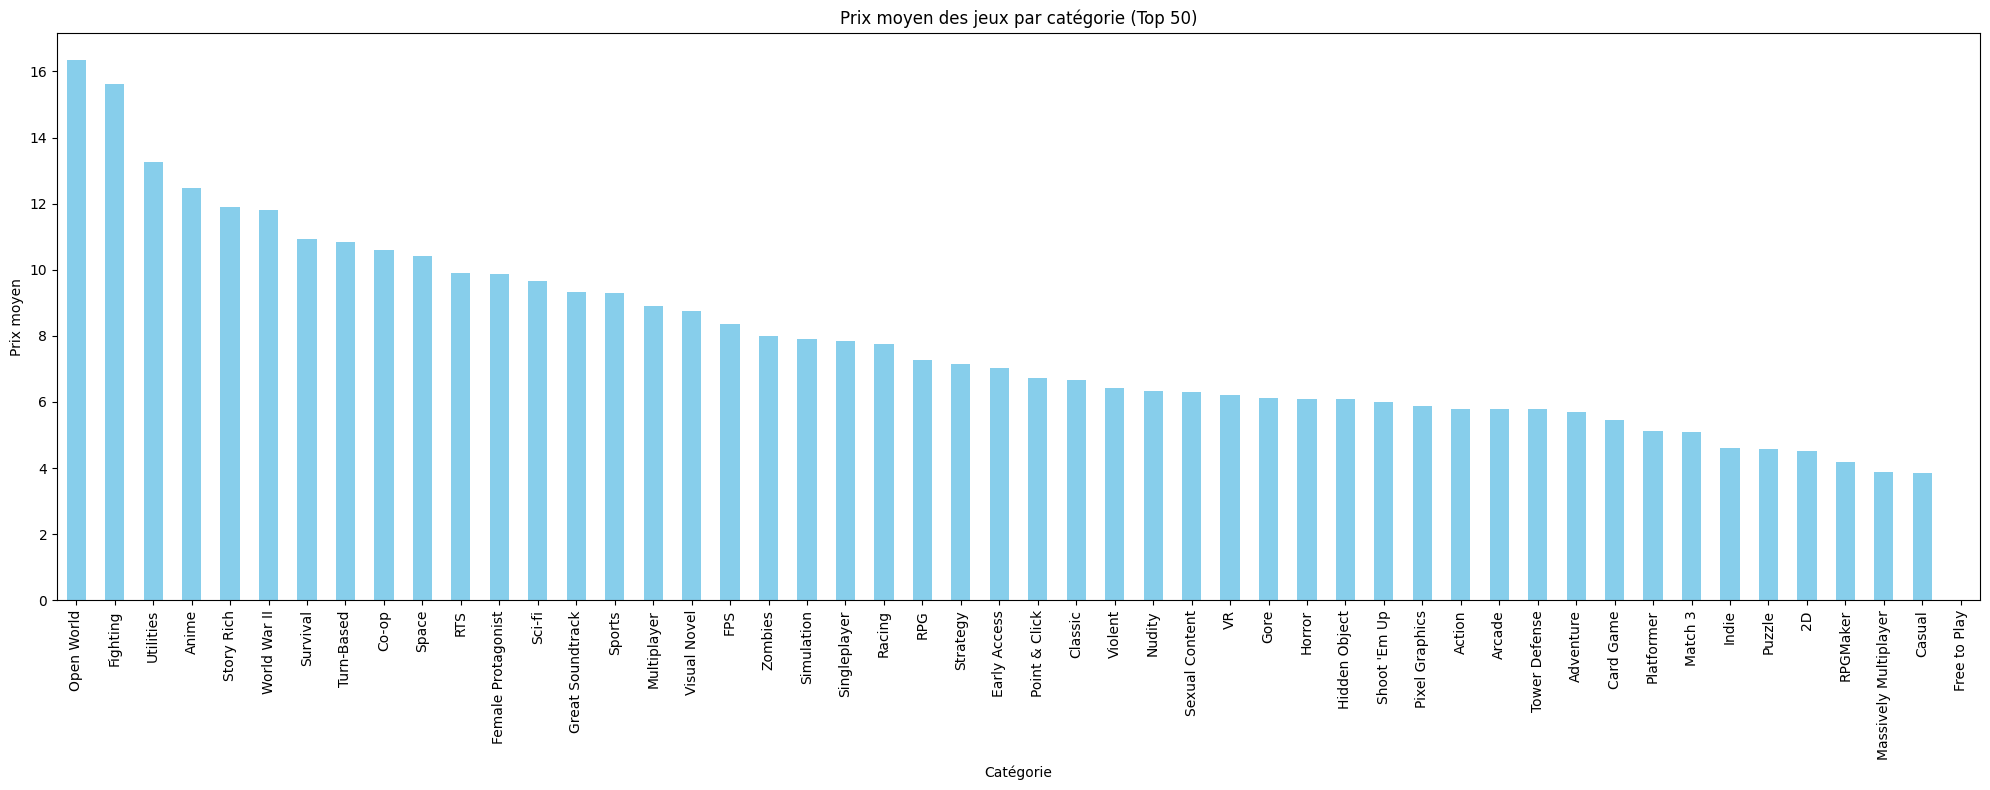

In [21]:
steam_viz_df['steamspy_tags'] = steam_viz_df['steamspy_tags'].str.split(';')

# Utiliser explode pour créer une ligne par catégorie 
steam_viz_df = steam_viz_df.explode('steamspy_tags')

# Obtenir les 50 catégories les plus fréquentes
top_50_categories = steam_viz_df['steamspy_tags'].value_counts().head(50)

# Limiter le DataFrame aux 50 catégories les plus fréquentes
steam_viz_df = steam_viz_df[steam_viz_df['steamspy_tags'].isin(top_50_categories.index)]

# Regrouper par catégorie et calculer le prix moyen des jeux
category_avg_price = steam_viz_df.groupby('steamspy_tags')['price'].mean().sort_values(ascending=False)

# Tracer la distribution
plt.figure(figsize=(20,8))
category_avg_price.plot(kind='bar', color='skyblue')
plt.title('Prix moyen des jeux par catégorie (Top 50)')
plt.xlabel('Catégorie')
plt.ylabel('Prix moyen')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

A refaire avec notre dataset pour voirle résultat

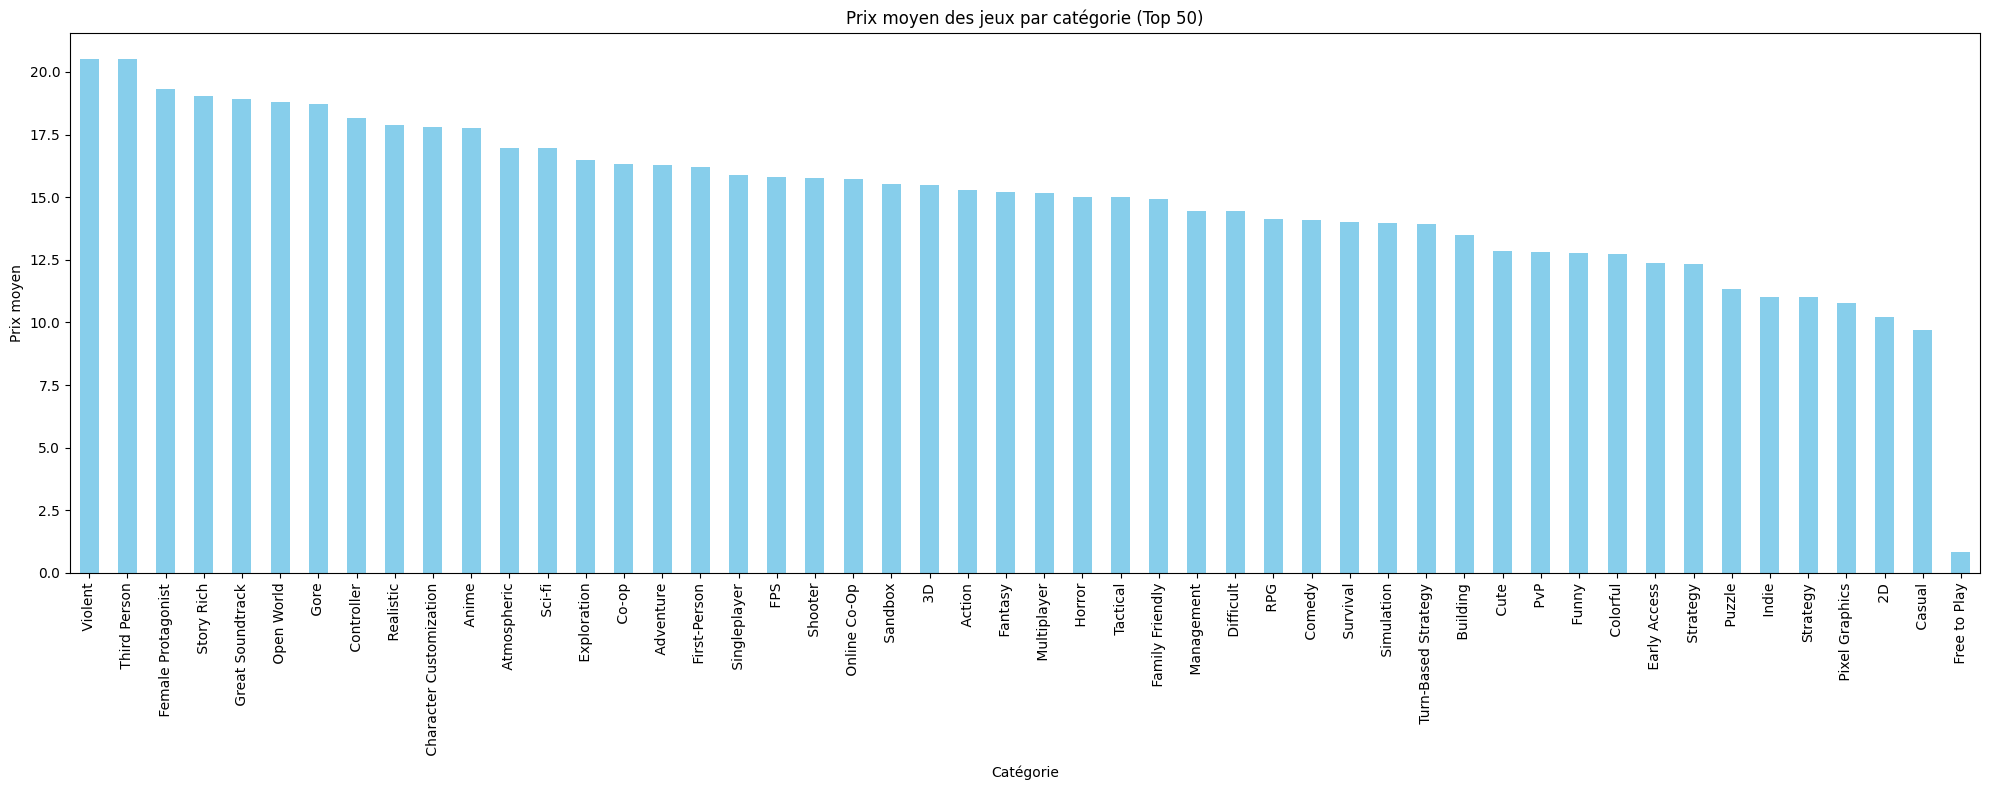

In [25]:
import ast
import matplotlib.pyplot as plt
import re

# Charger le jeu de données depuis un fichier CSV 
data = pd.read_csv("/workspaces/Steam-games-overview-Prj/bloc 3 ML TF-IDF/steam_data_sans_langues.csv")

# Define a custom function to extract the "final" value using regex
def extract_final_value(value):
    match = re.search(r"'final': (\d+)", value)
    if match:
        return int(match.group(1))
    elif 'Free To Play' in value:
        return 0
    else:
        return value  # Keep the original value if it doesn't match any condition

# Apply the custom function to the "Price infos" column
data['Price infos'] = data['Price infos'].apply(extract_final_value)
data = data[data['Price infos'] != 'Non renseigné']

def correct_price_in_euros(value):
    if int(value) == 0:
        return 0
    else:
        while len(str(value)) < 3: value = "0" + str(value) 
        return float(str(value)[:-2] + "." + str(value)[-2:])

data['Price infos'] = data['Price infos'].apply(correct_price_in_euros)

data['Genres'] = data['Genres'].str.split(',')

# Utiliser explode pour créer une ligne par catégorie 
data = data.explode('Genres')

# Obtenir les 50 catégories les plus fréquentes
top_50_categories = data['Genres'].value_counts().head(50)

# Limiter le DataFrame aux 50 catégories les plus fréquentes
data = data[data['Genres'].isin(top_50_categories.index)]

# Regrouper par catégorie et calculer le prix moyen des jeux
category_avg_price = data.groupby('Genres')['Price infos'].mean().sort_values(ascending=False)

# Tracer la distribution
plt.figure(figsize=(20,8))
category_avg_price.plot(kind='bar', color='skyblue')
plt.title('Prix moyen des jeux par catégorie (Top 50)')
plt.xlabel('Catégorie')
plt.ylabel('Prix moyen')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [23]:
data['Price infos']

0        0.00
1        0.00
2       59.99
3        0.00
4        0.00
        ...  
6069     0.79
6070     7.99
6071    29.99
6072     2.39
6073     0.00
Name: Price infos, Length: 5873, dtype: float64

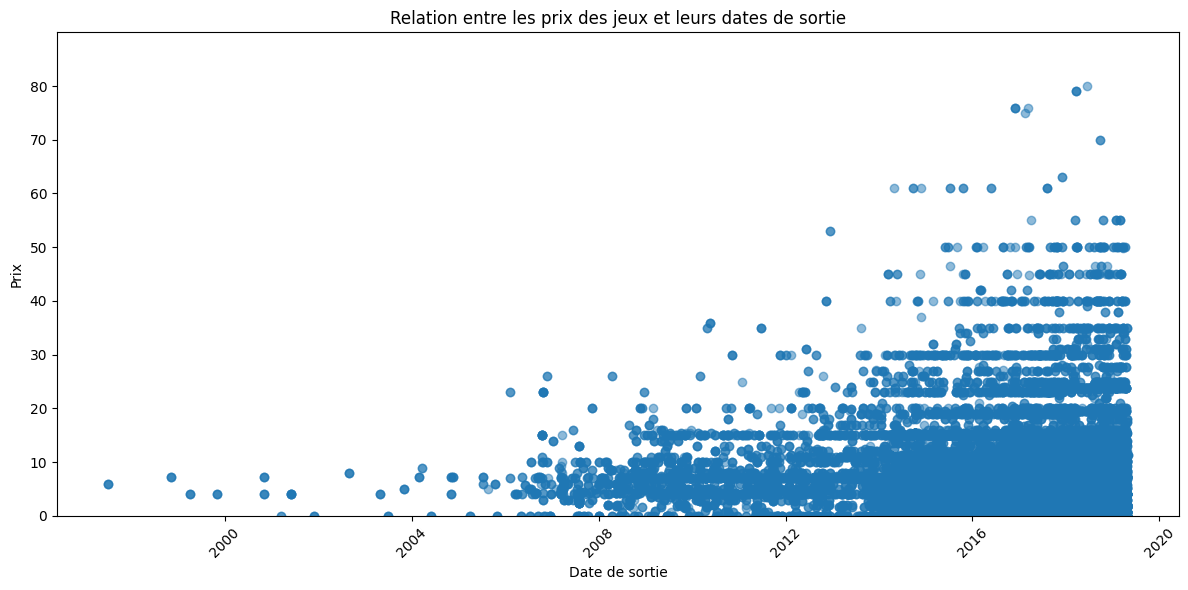

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# supprimer les données aberrantes
steam_viz_df = steam_viz_df[steam_viz_df['price'] <= 100]

# Convertir la colonne 'release_date' en format de date
steam_viz_df['release_date'] = pd.to_datetime(steam_viz_df['release_date'])

# Créer un graphique de dispersion pour les prix en fonction de la date de sortie
plt.figure(figsize=(12, 6))
plt.scatter(steam_viz_df['release_date'], steam_viz_df['price'], alpha=0.5)
plt.title('Relation entre les prix des jeux et leurs dates de sortie')
plt.xlabel('Date de sortie')
plt.ylabel('Prix')
plt.ylim(0, steam_viz_df['price'].max() + 10)  # Ajuster la limite y si nécessaire
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<function matplotlib.pyplot.tight_layout(*, pad: 'float' = 1.08, h_pad: 'float | None' = None, w_pad: 'float | None' = None, rect: 'tuple[float, float, float, float] | None' = None) -> 'None'>

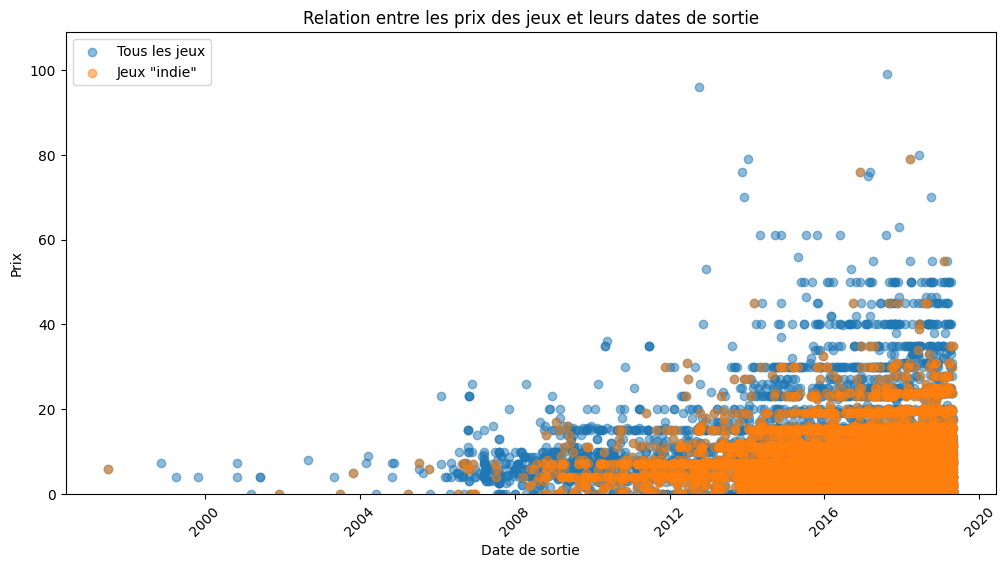

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
steam_viz_df = pd.read_csv("/workspaces/Steam-games-overview-Prj/steam.csv")

# Supprimer les données aberrantes
steam_viz_df = steam_viz_df[steam_viz_df['price'] <= 100]

# Convertir la colonne 'release_date' en format de date
steam_viz_df['release_date'] = pd.to_datetime(steam_viz_df['release_date'])

# Créer un graphique de dispersion pour tous les jeux
plt.figure(figsize=(12, 6))
plt.scatter(steam_viz_df['release_date'], steam_viz_df['price'], alpha=0.5, label='Tous les jeux')

# Filtrer les jeux qui contiennent le genre 'indie'
indie_games_df = steam_viz_df[steam_viz_df['genres'].str.contains('Indie', case=False, na=False)]

# Supprimer les données aberrantes pour les jeux 'indie'
indie_games_df = indie_games_df[indie_games_df['price'] <= 100]

# Convertir la colonne 'release_date' en format de date pour les jeux 'indie'
indie_games_df['release_date'] = pd.to_datetime(indie_games_df['release_date'])

# Créer un graphique de dispersion pour les jeux 'indie'
plt.scatter(indie_games_df['release_date'], indie_games_df['price'], alpha=0.5, label='Jeux "indie"')

# Titre et libellés des axes
plt.title('Relation entre les prix des jeux et leurs dates de sortie')
plt.xlabel('Date de sortie')
plt.ylabel('Prix')
plt.ylim(0, steam_viz_df['price'].max() + 10)  # Ajuster la limite y si nécessaire
plt.xticks(rotation=45)

# Légende
plt.legend()

# Afficher le graphique
plt.tight_layout

In [11]:
steam_viz_df = pd.read_csv('/workspaces/Steam-games-overview-Prj/steam.csv')

In [12]:
df = pd.read_csv("/workspaces/Steam-games-overview-Prj/Bloc1&2/steam_data.csv")
df.head()


,ID,Name,Current Players,Peak Players,Hours Played
0,730,Counter-Strike: Global Offensive,1071844,1369511,677763487
1,570,Dota 2,458884,855495,326040499
2,1086940,Baldur's Gate 3,229926,875343,338863234
3,578080,PUBG: BATTLEGROUNDS,210425,397857,132264026
4,1172470,Apex Legends,177677,451223,138449412


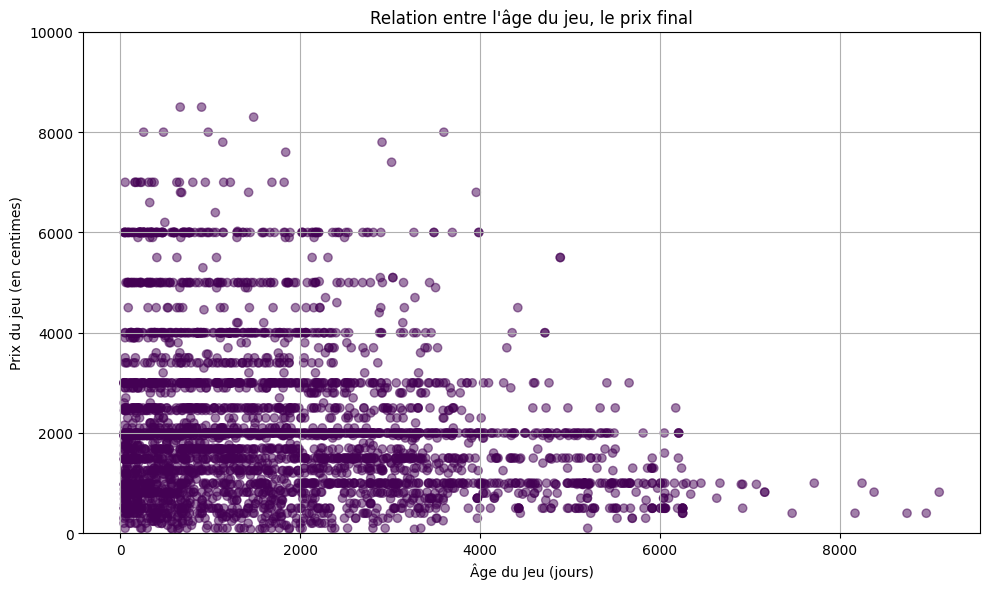

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# Charger le jeu de données depuis un fichier CSV
data = pd.read_csv("/workspaces/Steam-games-overview-Prj/bloc 3 ML TF-IDF/steam_data_sans_langues.csv")

# Filtrer les lignes où la colonne 'Price infos' contient "final_formatted"
filtered_data = data[data['Price infos'].str.contains("'initial': \d+, 'final': \d+, 'discount_percent': \d+, 'initial_formatted': '', 'final_formatted': '\d+,\d+'", case=False, na=False, regex=True)]

# Créer un nouveau DataFrame pour éviter les avertissements
processed_data = filtered_data.copy()

# Assurez-vous que la colonne 'Price infos' est une chaîne de caractères
processed_data['Price infos'] = processed_data['Price infos'].astype(str)

# Extraire les valeurs 'initial' et 'final' en utilisant des expressions régulières
initial_prices = processed_data['Price infos'].str.extract(r"'initial': (\d+)", expand=False).astype(float)
final_prices = processed_data['Price infos'].str.extract(r"'final': (\d+)", expand=False).astype(float)

# Ajouter les colonnes 'Prix Initial' et 'Prix Final' au DataFrame
processed_data['Prix Initial'] = initial_prices
processed_data['Prix Final'] = final_prices

# Convertir la colonne 'date_de_parution' en un objet datetime
processed_data['date_de_parution'] = pd.to_datetime(processed_data['date_de_parution'], errors='coerce')

# Calculer l'âge du jeu en jours par rapport à la date actuelle
current_date = datetime.now()
processed_data['Age du Jeu (jours)'] = (current_date - processed_data['date_de_parution']).dt.days

# Calculer la réduction en soustrayant le prix final du prix initial
processed_data['Réduction'] = processed_data['Prix Initial'] - processed_data['Prix Final']

y_max = 10000  # Le prix final maximum souhaité

# Créer un scatter plot pour visualiser la relation entre l'âge du jeu, le prix final et la réduction
plt.figure(figsize=(10, 6))
plt.scatter(processed_data['Age du Jeu (jours)'], processed_data['Prix Final'], c=processed_data['Réduction'], cmap='viridis', alpha=0.5)
#plt.colorbar(label='Réduction')
plt.xlabel('Âge du Jeu (jours)')
plt.ylabel('Prix du jeu (en centimes)')
plt.title('Relation entre l\'âge du jeu, le prix final')
plt.ylim(0, y_max)  # Limite l'axe y
plt.grid()
plt.tight_layout()
plt.show()


Tendances des Studios sur le prix des jeux

Focus on : Ubisoft, Rockstar Games, Valve, LucasArts, Treyarch, Nadeo, DICE, Capcom, Bethesda Game Studios

In [14]:
# Extract the unique developers from the filtered DataFrame
unique_developers = data['Développeur'].unique()

# Convert the unique developers to a list
unique_developers_list = list(unique_developers)

# Print the list of unique developers
print(unique_developers_list)

["['Valve', 'Hidden Path Entertainment']", "['Valve']", "['Larian Studios']", "['KRAFTON, Inc.']", "['Respawn Entertainment']", "['24 Entertainment']", "['Rockstar North']", "['Wallpaper Engine Team']", "['Facepunch Studios']", "['Smartly Dressed Games']", "['LB Game']", "['Grinding Gear Games']", "['Sports Interactive']", "['Gaijin Entertainment']", "['FromSoftware Inc.']", "['Infinity Ward', 'Raven Software', 'Beenox', 'Treyarch', 'High Moon Studios', 'Sledgehammer Games', 'Activision Shanghai', 'Demonware', 'Toys for Bob']", "['Bungie']", "['Digital Extremes']", "['Ubisoft Montreal']", "['Firaxis Games', 'Aspyr (Mac)', 'Aspyr (Linux)']", "['Studio Wildcard', 'Instinct Games', 'Efecto Studios', 'Virtual Basement LLC']", "['EA Canada & EA Romania']", "['Paradox Development Studio']", "['OVERKILL - a Starbreeze Studio.']", "['Klei Entertainment']", "['Wemade Next']", "['Re-Logic']", "['Bohemia Interactive']", "['Behaviour Interactive Inc.']", "['Smilegate RPG']", "['ConcernedApe']", "[

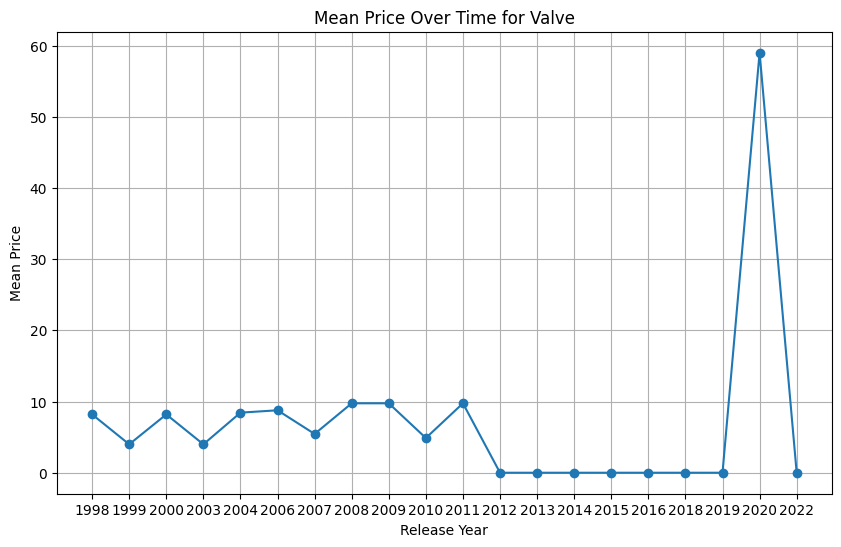

In [15]:
import ast
import matplotlib.pyplot as plt
import re

# Charger le jeu de données depuis un fichier CSV 
data = pd.read_csv("/workspaces/Steam-games-overview-Prj/bloc 3 ML TF-IDF/steam_data_sans_langues.csv")

# Define a custom function to extract the "final" value using regex
def extract_final_value(value):
    match = re.search(r"'final': (\d+)", value)
    if match:
        return int(match.group(1))
    elif 'Free To Play' in value:
        return 0
    else:
        return value  # Keep the original value if it doesn't match any condition

# Apply the custom function to the "Price infos" column
data['Price infos'] = data['Price infos'].apply(extract_final_value)
data = data[data['Price infos'] != 'Non renseigné']

def correct_price_in_euros(value):
    if int(value) == 0:
        return 0
    else:
        while len(str(value)) < 3: value = "0" + str(value) 
        return float(str(value)[:-2] + "." + str(value)[-2:])

data['Price infos'] = data['Price infos'].apply(correct_price_in_euros)

# Filter out rows where "date_de_parution" is NaN, empty, or "Non renseignée"
data = data[data['date_de_parution'].notna() & (data['date_de_parution'] != "") & (data['date_de_parution'] != "Non renseignée")]
data = data[data['Développeur'].notna() & (data['Développeur'] != "") & (data['date_de_parution'] != "Non renseignée")]

# Extract the year from the last 4 characters of the "date_de_parution" column
data['release_year'] = data['date_de_parution'].str[-4:]

# Choose a specific developer (e.g., 'Valve') to plot
specific_developer = 'Valve'

# Filter on the column "Développeur" and keep only rows where specific_developer is in Développeur
data = data[data['Développeur'].str.contains(specific_developer)]

# Group the data by release year and calculate the mean price
mean_price_by_year = data.groupby('release_year')['Price infos'].mean()

# Reset the index to make 'release_year' a column
mean_price_by_year = mean_price_by_year.reset_index()

# Create a graph
plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_year['release_year'], mean_price_by_year['Price infos'], marker='o')
plt.title(f'Mean Price Over Time for {specific_developer}')
plt.xlabel('Release Year')
plt.ylabel('Mean Price')
plt.grid(True)
plt.show()

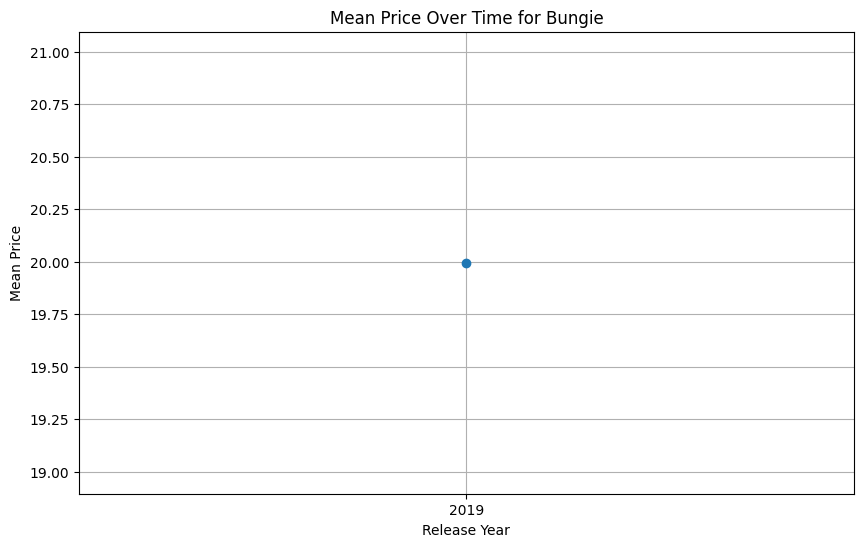

In [16]:
import ast
import matplotlib.pyplot as plt
import re

# Charger le jeu de données depuis un fichier CSV 
data = pd.read_csv("/workspaces/Steam-games-overview-Prj/bloc 3 ML TF-IDF/steam_data_sans_langues.csv")

# Define a custom function to extract the "final" value using regex
def extract_final_value(value):
    match = re.search(r"'final': (\d+)", value)
    if match:
        return int(match.group(1))
    elif 'Free To Play' in value:
        return 0
    else:
        return value  # Keep the original value if it doesn't match any condition

# Apply the custom function to the "Price infos" column
data['Price infos'] = data['Price infos'].apply(extract_final_value)
data = data[data['Price infos'] != 'Non renseigné']

def correct_price_in_euros(value):
    if int(value) == 0:
        return 0
    else:
        while len(str(value)) < 3: value = "0" + str(value) 
        return float(str(value)[:-2] + "." + str(value)[-2:])

data['Price infos'] = data['Price infos'].apply(correct_price_in_euros)

# Filter out rows where "date_de_parution" is NaN, empty, or "Non renseignée"
data = data[data['date_de_parution'].notna() & (data['date_de_parution'] != "") & (data['date_de_parution'] != "Non renseignée")]
data = data[data['Développeur'].notna() & (data['Développeur'] != "") & (data['date_de_parution'] != "Non renseignée")]

# Extract the year from the last 4 characters of the "date_de_parution" column
data['release_year'] = data['date_de_parution'].str[-4:]

# Choose a specific developer 
specific_developer = 'Bungie'

# Filter on the column "Développeur" and keep only rows where specific_developer is in Développeur
data = data[data['Développeur'].str.contains(specific_developer)]

# Group the data by release year and calculate the mean price
mean_price_by_year = data.groupby('release_year')['Price infos'].mean()

# Reset the index to make 'release_year' a column
mean_price_by_year = mean_price_by_year.reset_index()

# Create a graph
plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_year['release_year'], mean_price_by_year['Price infos'], marker='o')
plt.title(f'Mean Price Over Time for {specific_developer}')
plt.xlabel('Release Year')
plt.ylabel('Mean Price')
plt.grid(True)
plt.show()

Comme on peut le voir sur ce dernier graphique représentant le prix des 3 derniers jeux du studio Nadeo, les modèles économiques des jeux vidéos ont aussi évolués. Nadeo, qui sort toujours le même jeu "Trackmania" remis au goût du jour, à décider en 2023 de sortir cette fois-ci une version free to play du jeu; le modèle économique de ce dernier résidant sur un système d'abonnement temporaire permettant d'accéder pleinement au contenu du jeu comme on pourrait voir sur Dofus ou autre. C'est le cas de plus en plus de jeux vidéos qui préfèrent sortir des jeux f2p avec divers modèles économiques.

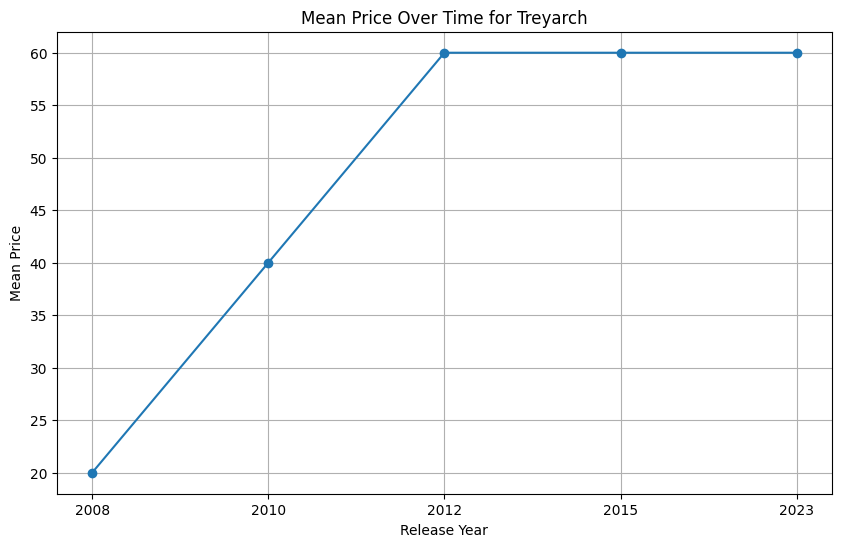

In [17]:
import ast
import matplotlib.pyplot as plt
import re

# Charger le jeu de données depuis un fichier CSV 
data = pd.read_csv("/workspaces/Steam-games-overview-Prj/bloc 3 ML TF-IDF/steam_data_sans_langues.csv")

# Define a custom function to extract the "final" value using regex
def extract_final_value(value):
    match = re.search(r"'final': (\d+)", value)
    if match:
        return int(match.group(1))
    elif 'Free To Play' in value:
        return 0
    else:
        return value  # Keep the original value if it doesn't match any condition

# Apply the custom function to the "Price infos" column
data['Price infos'] = data['Price infos'].apply(extract_final_value)
data = data[data['Price infos'] != 'Non renseigné']

def correct_price_in_euros(value):
    if int(value) == 0:
        return 0
    else:
        while len(str(value)) < 3: value = "0" + str(value) 
        return float(str(value)[:-2] + "." + str(value)[-2:])

data['Price infos'] = data['Price infos'].apply(correct_price_in_euros)

# Filter out rows where "date_de_parution" is NaN, empty, or "Non renseignée"
data = data[data['date_de_parution'].notna() & (data['date_de_parution'] != "") & (data['date_de_parution'] != "Non renseignée")]
data = data[data['Développeur'].notna() & (data['Développeur'] != "") & (data['date_de_parution'] != "Non renseignée")]

# Extract the year from the last 4 characters of the "date_de_parution" column
data['release_year'] = data['date_de_parution'].str[-4:]

# Choose a specific developer 
specific_developer = 'Treyarch'

# Filter on the column "Développeur" and keep only rows where specific_developer is in Développeur
data = data[data['Développeur'].str.contains(specific_developer)]

# Group the data by release year and calculate the mean price
mean_price_by_year = data.groupby('release_year')['Price infos'].mean()

# Reset the index to make 'release_year' a column
mean_price_by_year = mean_price_by_year.reset_index()

# Create a graph
plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_year['release_year'], mean_price_by_year['Price infos'], marker='o')
plt.title(f'Mean Price Over Time for {specific_developer}')
plt.xlabel('Release Year')
plt.ylabel('Mean Price')
plt.grid(True)
plt.show()

Focus sur les prix par Editeur par année

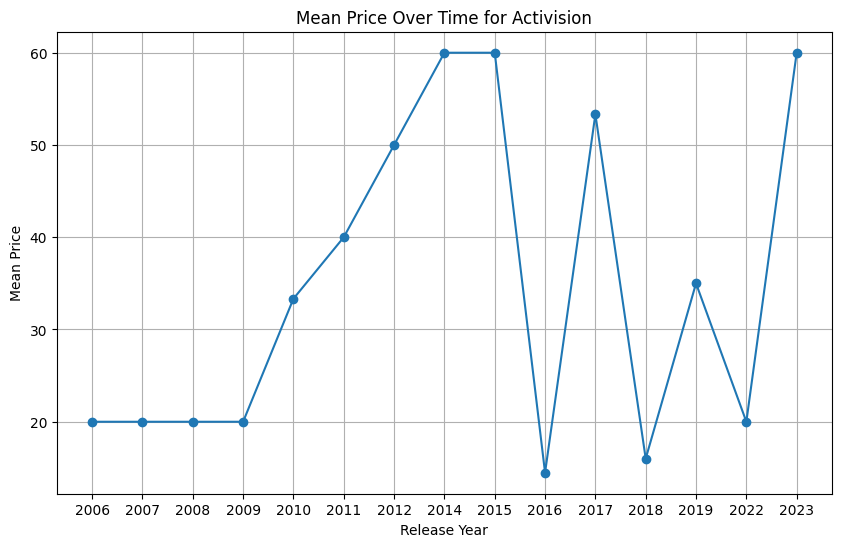

In [18]:
import ast
import matplotlib.pyplot as plt
import re

# Charger le jeu de données depuis un fichier CSV 
data = pd.read_csv("/workspaces/Steam-games-overview-Prj/bloc 3 ML TF-IDF/steam_data_sans_langues.csv")

# Define a custom function to extract the "final" value using regex
def extract_final_value(value):
    match = re.search(r"'final': (\d+)", value)
    if match:
        return int(match.group(1))
    elif 'Free To Play' in value:
        return 0
    else:
        return value  # Keep the original value if it doesn't match any condition

# Apply the custom function to the "Price infos" column
data['Price infos'] = data['Price infos'].apply(extract_final_value)
data = data[data['Price infos'] != 'Non renseigné']

def correct_price_in_euros(value):
    if int(value) == 0:
        return 0
    else:
        while len(str(value)) < 3: value = "0" + str(value) 
        return float(str(value)[:-2] + "." + str(value)[-2:])

data['Price infos'] = data['Price infos'].apply(correct_price_in_euros)

# Filter out rows where "date_de_parution" is NaN, empty, or "Non renseignée"
data = data[data['date_de_parution'].notna() & (data['date_de_parution'] != "") & (data['date_de_parution'] != "Non renseignée")]
data = data[data['Éditeur'].notna() & (data['Éditeur'] != "") & (data['date_de_parution'] != "Non renseignée")]

# Extract the year from the last 4 characters of the "date_de_parution" column
data['release_year'] = data['date_de_parution'].str[-4:]

# Choose a specific editor 
specific_editor = 'Activision'

# Filter on the column "Éditeur" and keep only rows where specific_developer is in Développeur
data = data[data['Éditeur'].str.contains(specific_editor)]

# Group the data by release year and calculate the mean price
mean_price_by_year = data.groupby('release_year')['Price infos'].mean()

# Reset the index to make 'release_year' a column
mean_price_by_year = mean_price_by_year.reset_index()

# Create a graph
plt.figure(figsize=(10, 6))
plt.plot(mean_price_by_year['release_year'], mean_price_by_year['Price infos'], marker='o')
plt.title(f'Mean Price Over Time for {specific_editor}')
plt.xlabel('Release Year')
plt.ylabel('Mean Price')
plt.grid(True)
plt.show()

Test non concluants :

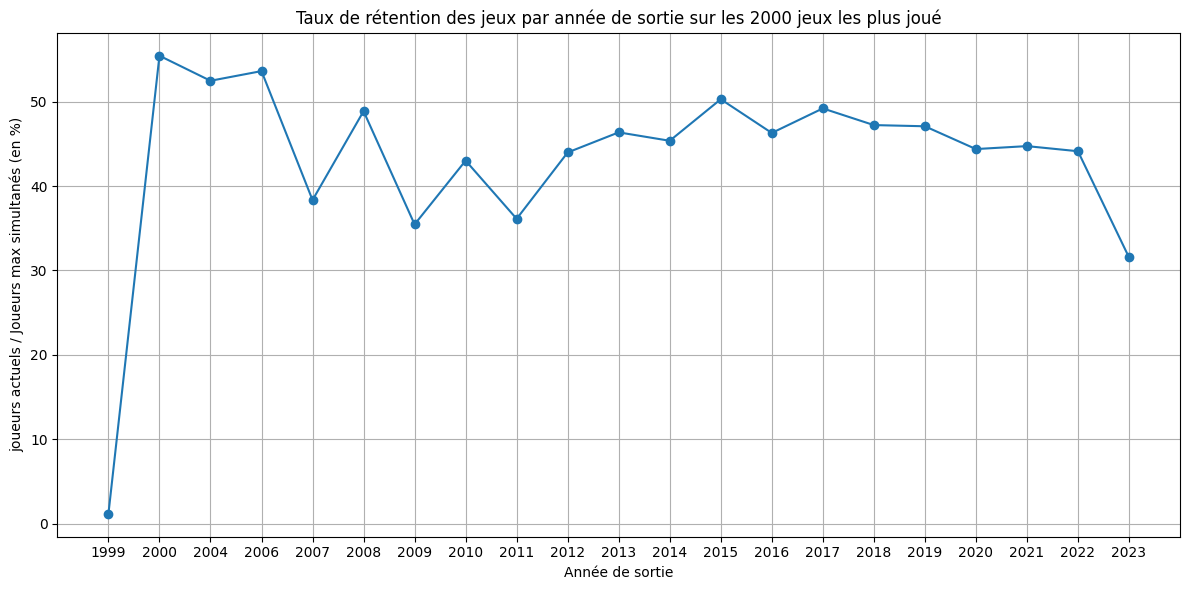

In [19]:
import pandas as pd

# Charger les données des deux fichiers CSV
data_df1 = pd.read_csv('/workspaces/Steam-games-overview-Prj/Bloc1&2/steam_data.csv')
data_df2 = pd.read_csv('/workspaces/Steam-games-overview-Prj/bloc 3 ML TF-IDF/steam_data_sans_langues.csv')

# Fusionner les deux DataFrames en utilisant le nom du jeu comme clé de correspondance
merged_df = data_df1.merge(data_df2, on='Name', how='inner')

# Filtrer les jeux avec un nombre de Peak Players supérieur à 1000
merged_df = merged_df[merged_df['Peak Players'] > 1000]

# Réinitialiser l'index du DataFrame
merged_df = merged_df.reset_index(drop=True)

# Extract the year from the last 4 characters of the "date_de_parution" column
merged_df['release_year'] = merged_df['date_de_parution'].str[-4:]

# Calculer le taux de rétention en pourcentage
merged_df['Retention Rate (%)'] = (merged_df['Current Players'] / merged_df['Peak Players']) * 100

# Calculer la moyenne du taux de rétention par année de sortie
retention_by_year = merged_df.groupby('release_year')['Retention Rate (%)'].mean()

#drop false values in release_year
merged_df = merged_df[merged_df['release_year'].apply(type) != float]

# Convert the 'release_year' column to integers
merged_df['release_year'] = merged_df['release_year'].astype(int)

# Sort the DataFrame by the 'release_year' column in ascending order
merged_df = merged_df.sort_values(by='release_year', ascending=True)

# Créer un graphique de ligne pour visualiser le taux de rétention moyen par année
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['release_year'], merged_df['Retention Rate (%)'], alpha=0.5)
plt.plot(retention_by_year.index, retention_by_year.values, marker='o', linestyle='-')
plt.title('Taux de rétention des jeux par année de sortie sur les 2000 jeux les plus joué')
plt.xlabel('Année de sortie')
plt.ylabel('joueurs actuels / Joueurs max simultanés (en %)')
plt.grid(True)
plt.tight_layout()
plt.show()

Index(['ID', 'name', 'Current Players', 'Peak Players', 'Hours Played'], dtype='object')


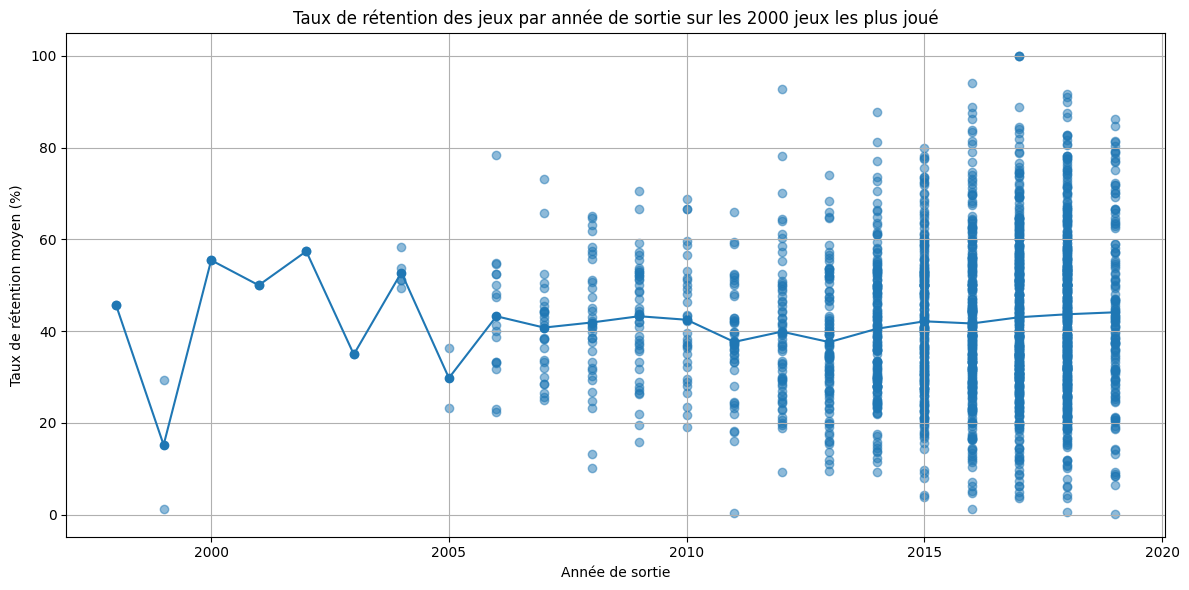

In [20]:
import pandas as pd

# Charger les données principales depuis le fichier "steam.csv"
df = pd.read_csv('/workspaces/Steam-games-overview-Prj/steam.csv')

# Charger les données de date de sortie depuis le fichier "steam_data.csv"
date_df = pd.read_csv('/workspaces/Steam-games-overview-Prj/Bloc1&2/steam_data.csv')
date_df = date_df.rename(columns={'Name': 'name'})
print(date_df.columns)

# Effectuer une opération de fusion en utilisant le nom du jeu comme clé de correspondance
merged_df = df[['name', 'release_date']].merge(date_df[['name', 'Current Players', 'Peak Players']], on='name', how='left')

merged_df = merged_df.dropna(subset=['Peak Players'])

# Réinitialiser l'index du DataFrame
merged_df = merged_df.reset_index(drop=True)

# Convertir la colonne 'Release Date' en datetime
merged_df['Release Date'] = pd.to_datetime(merged_df['release_date'])

# Extraire l'année de sortie pour chaque jeu
merged_df['Release Year'] = merged_df['Release Date'].dt.year

# Calculer le taux de rétention en pourcentage
merged_df['Retention Rate (%)'] = (merged_df['Current Players'] / merged_df['Peak Players']) * 100

# Calculer la moyenne du taux de rétention par année de sortie
retention_by_year = merged_df.groupby('Release Year')['Retention Rate (%)'].mean()

# Créer un graphique de ligne pour visualiser le taux de rétention moyen par année
plt.figure(figsize=(12, 6))
plt.scatter(merged_df['Release Year'], merged_df['Retention Rate (%)'], alpha=0.5)
plt.plot(retention_by_year.index, retention_by_year.values, marker='o', linestyle='-')
plt.title('Taux de rétention des jeux par année de sortie sur les 2000 jeux les plus joué')
plt.xlabel('Année de sortie')
plt.ylabel('Taux de rétention moyen (%)')
plt.grid(True)
plt.tight_layout()
plt.show()

